# Unsupervised ML (Clustering)


#### Assumption:
You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"



4.2  Create DataFrame for each cluster that shows data according to the areas.



4.3  "Analyse your clusters and prepare a report that explains all your observations.



Example - 



1. What is impacting more crimes in sensitive areas. 



2. What needs to be done to reduce crime. 



3. Most safe and unsafe districts.



4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



4.4   Capstone project overall story in your own words. Min 1000 wor

### Explaination:
We chose the following two datasets for this phase:
1. 01_District-wise-crimes-committed_IPC-2001-2012.csv
2. 42 District-by-District Crimes Committed Against Women, 2001-2012.csv

We decided to combine these two datasets only because they include sufficient data and provide significant information about what we desire. Higher authorities will have enough information from these alone to know that any questions they may have will have an answer in one of these two datasets, thus we will merge them.

#### 4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN, k_means, KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# the datasets we are taking for clustering and merging
ipc_data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")
women_data = pd.read_csv("42_District_wise_crimes_committed_against_women_2001_2012.csv")

# Rename the "Year" column in women_data to "YEAR"
women_data.rename(columns={"Year": "YEAR"}, inplace=True)

# Merging t datasets based on STATE/UT, DISTRICT, and YEAR columns
merged_data = ipc_data.merge(women_data, on=["STATE/UT", "DISTRICT", "YEAR"], how="left")

# Selecting  the relevant columns for clustering
relevant_columns = ["STATE/UT", "DISTRICT", "YEAR", "MURDER", "RAPE", "KIDNAPPING & ABDUCTION",
                    "DACOITY", "ROBBERY", "ARSON", "HURT/GREVIOUS HURT",
                    "Rape", "Kidnapping and Abduction", "Dowry Deaths",
                    "Assault on women with intent to outrage her modesty",
                    "Insult to modesty of Women", "Cruelty by Husband or his Relatives",
                    "Importation of Girls"]

# Create a new dataframe with the selected columns
df_m = merged_data[relevant_columns]

# Print the merged and selected data
print(df_m.head())


         STATE/UT       DISTRICT  YEAR  MURDER  RAPE  KIDNAPPING & ABDUCTION  \
0  ANDHRA PRADESH       ADILABAD  2001     101    50                      46   
1  ANDHRA PRADESH      ANANTAPUR  2001     151    23                      53   
2  ANDHRA PRADESH       CHITTOOR  2001     101    27                      59   
3  ANDHRA PRADESH       CUDDAPAH  2001      80    20                      25   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82    23                      49   

   DACOITY  ROBBERY  ARSON  HURT/GREVIOUS HURT  Rape  \
0        9       41     30                1131  50.0   
1        8       16     69                1543  23.0   
2        4       14     38                2088  27.0   
3        1        4     23                 795  20.0   
4        4       25     41                1244  23.0   

   Kidnapping and Abduction  Dowry Deaths  \
0                      30.0          16.0   
1                      30.0           7.0   
2                      34.0          14.0   
3 

##### Note: 
The combined dataset "df_m" is available right now. To achieve the best results, we combined the two datasets ipc_crime and women_crime. These datasets are suitable for analysing what we want and what the points are expressing. As they represent two significant items that require our attention, these two datasets contain sufficient information to allow us to get all the information we need from them. The two data sets are thus, in my opinion, pertinent.

##### we apply some relevent operations to check the data

In [6]:
df_m.shape  # checking shape of dataset

(8599, 17)

In [7]:
df_m.columns   # columnsof dataset

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'RAPE',
       'KIDNAPPING & ABDUCTION', 'DACOITY', 'ROBBERY', 'ARSON',
       'HURT/GREVIOUS HURT', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [8]:
df_m.drop_duplicates(inplace=True)    # dropping dupoplicates if it has any

In [9]:
df_m.shape   # as there is no duplicate values so there is  no change in data.

(8599, 17)

In [13]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8599 entries, 0 to 8598
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   STATE/UT                                             8599 non-null   object 
 1   DISTRICT                                             8599 non-null   object 
 2   YEAR                                                 8599 non-null   int64  
 3   MURDER                                               8599 non-null   int64  
 4   RAPE                                                 8599 non-null   int64  
 5   KIDNAPPING & ABDUCTION                               8599 non-null   int64  
 6   DACOITY                                              8599 non-null   int64  
 7   ROBBERY                                              8599 non-null   int64  
 8   ARSON                                                8599 non-null  

In [14]:
# Checkinh for null values in dataset
df_m.isna().sum()

STATE/UT                                                 0
DISTRICT                                                 0
YEAR                                                     0
MURDER                                                   0
RAPE                                                     0
KIDNAPPING & ABDUCTION                                   0
DACOITY                                                  0
ROBBERY                                                  0
ARSON                                                    0
HURT/GREVIOUS HURT                                       0
Rape                                                   171
Kidnapping and Abduction                               171
Dowry Deaths                                           171
Assault on women with intent to outrage her modesty    171
Insult to modesty of Women                             171
Cruelty by Husband or his Relatives                    171
Importation of Girls                                   1

Since null value columns include actual data, we are unable to assign a number to them; instead, we shall set their null values to 0.

In [15]:
# Filling null values
df_m.fillna(0, inplace=True)

In [16]:
df_m.isnull().sum().sum()   # now there is no null values in data we will move forward

0

In [17]:
df_m.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,8599.0,2006.636120,3.464042,2001.0,2004.0,2007.0,2010.0,2012.0
MURDER,8599.0,46.812885,42.756681,0.0,18.0,37.0,63.0,542.0
RAPE,8599.0,27.809978,30.897081,0.0,8.0,19.0,39.0,568.0
KIDNAPPING & ABDUCTION,8599.0,41.499942,56.059121,0.0,9.0,24.0,52.0,587.0
DACOITY,8599.0,6.908827,10.944841,0.0,1.0,3.0,9.0,219.0
ROBBERY,8599.0,28.871613,50.933343,0.0,6.0,16.0,34.0,1131.0
ARSON,8599.0,13.222933,30.412263,0.0,2.0,8.0,18.0,2350.0
HURT/GREVIOUS HURT,8599.0,392.124200,559.550152,0.0,40.0,191.0,490.0,4837.0
Rape,8599.0,27.062914,30.653173,0.0,7.0,19.0,37.5,568.0
Kidnapping and Abduction,8599.0,28.870450,39.745524,0.0,5.0,16.0,38.0,492.0


##### Note:
Excluding the STATE/UT, DISTRICT, and YEAR columns from the dataframe df_m before applying K-means clustering.

The reason for excluding these columns is that they contain categorical or temporal information (such as the state, district, and year) that cannot be directly used for clustering. K-means clustering is a distance-based algorithm that operates on numerical data. Therefore, we exclude these non-numerical columns and focus only on the numerical columns representing crime statistics.

In [18]:
# Exclude STATE/UT, DISTRICT, and YEAR columns for clustering
data_for_clustering = df_m.iloc[:, 3:]

In [19]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)    

In [20]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [21]:
# Adding the cluster labels to the dataset
df_m["Cluster"] = clusters

In [22]:
# Defining the cluster labels
cluster_labels = {
    0: "Sensitive Area's",
    1: "Moderate Area's",
    2: "Peaceful Area's"
}

In [23]:
# Maped the cluster labels to the dataset
df_m["Cluster Label"] = df_m["Cluster"].map(cluster_labels)

In [24]:
# Printing the resulting clusters
print(df_m[["STATE/UT", "DISTRICT", "Cluster Label"]].head())

         STATE/UT       DISTRICT     Cluster Label
0  ANDHRA PRADESH       ADILABAD  Sensitive Area's
1  ANDHRA PRADESH      ANANTAPUR  Sensitive Area's
2  ANDHRA PRADESH       CHITTOOR  Sensitive Area's
3  ANDHRA PRADESH       CUDDAPAH  Sensitive Area's
4  ANDHRA PRADESH  EAST GODAVARI  Sensitive Area's


In [25]:
print(df_m[["STATE/UT", "DISTRICT", "Cluster Label"]].head(25))

          STATE/UT           DISTRICT     Cluster Label
0   ANDHRA PRADESH           ADILABAD  Sensitive Area's
1   ANDHRA PRADESH          ANANTAPUR  Sensitive Area's
2   ANDHRA PRADESH           CHITTOOR  Sensitive Area's
3   ANDHRA PRADESH           CUDDAPAH  Sensitive Area's
4   ANDHRA PRADESH      EAST GODAVARI  Sensitive Area's
5   ANDHRA PRADESH      GUNTAKAL RLY.   Moderate Area's
6   ANDHRA PRADESH             GUNTUR   Peaceful Area's
7   ANDHRA PRADESH     HYDERABAD CITY   Peaceful Area's
8   ANDHRA PRADESH         KARIMNAGAR   Peaceful Area's
9   ANDHRA PRADESH            KHAMMAM  Sensitive Area's
10  ANDHRA PRADESH            KRISHNA  Sensitive Area's
11  ANDHRA PRADESH            KURNOOL  Sensitive Area's
12  ANDHRA PRADESH      MAHABOOBNAGAR  Sensitive Area's
13  ANDHRA PRADESH              MEDAK  Sensitive Area's
14  ANDHRA PRADESH           NALGONDA  Sensitive Area's
15  ANDHRA PRADESH            NELLORE  Sensitive Area's
16  ANDHRA PRADESH          NIZAMABAD  Sensitive

#### 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [26]:
# Creating DataFrames for each cluster
cluster_dfs = []
for cluster_label in cluster_labels.values():
    cluster_df = df_m[df_m["Cluster Label"] == cluster_label].copy()
    cluster_dfs.append(cluster_df)

In [28]:
# Print data for each cluster
for i, cluster_df in enumerate(cluster_dfs):
    print(f"Cluster {i+1}: {cluster_labels[i]}")
    print(cluster_df)
    print()

Cluster 1: Sensitive Area's
            STATE/UT       DISTRICT  YEAR  MURDER  RAPE  \
0     ANDHRA PRADESH       ADILABAD  2001     101    50   
1     ANDHRA PRADESH      ANANTAPUR  2001     151    23   
2     ANDHRA PRADESH       CHITTOOR  2001     101    27   
3     ANDHRA PRADESH       CUDDAPAH  2001      80    20   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82    23   
...              ...            ...   ...     ...   ...   
8589        DELHI UT     NORTH-WEST  2012      60    64   
8590        DELHI UT          OUTER  2012      96    67   
8592        DELHI UT     SOUTH-EAST  2012      46   116   
8593        DELHI UT     SOUTH-WEST  2012      47    87   
8595        DELHI UT           WEST  2012      52    79   

      KIDNAPPING & ABDUCTION  DACOITY  ROBBERY  ARSON  HURT/GREVIOUS HURT  \
0                         46        9       41     30                1131   
1                         53        8       16     69                1543   
2                         59    

In [29]:
cluster_df.head(10)

,STATE/UT,DISTRICT,YEAR,MURDER,RAPE,KIDNAPPING & ABDUCTION,DACOITY,ROBBERY,ARSON,HURT/GREVIOUS HURT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,Cluster,Cluster Label
6,ANDHRA PRADESH,GUNTUR,2001,182,54,82,16,59,43,1792,54.0,51.0,7.0,139.0,129.0,378.0,0.0,2,Peaceful Area's
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,37,80,13,67,0,3137,37.0,39.0,24.0,118.0,27.0,746.0,0.0,2,Peaceful Area's
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,56,67,27,50,33,1392,56.0,49.0,62.0,414.0,81.0,224.0,0.0,2,Peaceful Area's
18,ANDHRA PRADESH,RANGA REDDY,2001,214,72,106,24,78,67,2829,72.0,83.0,37.0,113.0,55.0,421.0,7.0,2,Peaceful Area's
99,BIHAR,PATNA,2001,434,27,197,91,414,54,354,27.0,11.0,90.0,47.0,0.0,152.0,39.0,2,Peaceful Area's
117,CHHATTISGARH,DURG,2001,76,144,57,9,50,35,595,144.0,42.0,12.0,287.0,38.0,231.0,0.0,2,Peaceful Area's
133,GUJARAT,AHMEDABAD COMMR.,2001,90,39,143,18,192,2,1311,39.0,117.0,7.0,54.0,27.0,530.0,0.0,2,Peaceful Area's
244,KARNATAKA,BANGALORE COMMR.,2001,221,40,152,31,284,3,3735,40.0,56.0,40.0,223.0,51.0,229.0,0.0,2,Peaceful Area's
309,MADHYA PRADESH,JABALPUR,2001,103,108,33,0,126,15,2024,108.0,20.0,28.0,264.0,50.0,81.0,0.0,2,Peaceful Area's
325,MADHYA PRADESH,SAGAR,2001,84,141,30,4,53,51,2669,141.0,16.0,29.0,509.0,0.0,142.0,0.0,2,Peaceful Area's


#### 4.3  "Analyse your clusters and prepare a report that explains all your observations.



Example - 



1. What is impacting more crimes in sensitive areas. 



2. What needs to be done to reduce crime. 



3. Most safe and unsafe districts.



4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"

### Graphs and Visualising:

In [30]:
# Finding categorical columns in the cluster DataFrame
categorical_columns = [col for col in cluster_df.columns if cluster_df[col].dtype == 'object']
    
# Print the categorical columns
print("Categorical Columns:")
print(categorical_columns)

Categorical Columns:
['STATE/UT', 'DISTRICT', 'Cluster Label']


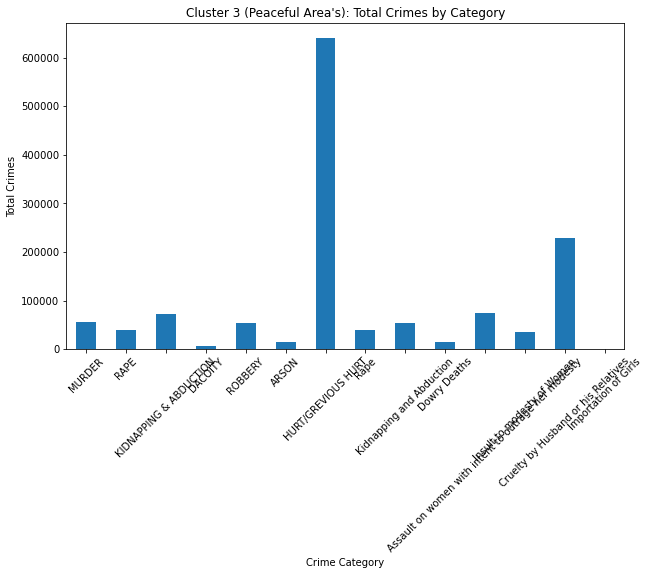

In [31]:
#  Bar plot of total crimes for each category
category_columns = ["MURDER", "RAPE", "KIDNAPPING & ABDUCTION", "DACOITY", "ROBBERY", "ARSON",
                        "HURT/GREVIOUS HURT", "Rape", "Kidnapping and Abduction",
                        "Dowry Deaths", "Assault on women with intent to outrage her modesty",
                        "Insult to modesty of Women", "Cruelty by Husband or his Relatives",
                        "Importation of Girls"]
category_totals = cluster_df[category_columns].sum()
category_totals.plot(kind="bar", figsize=(10, 6))
plt.xlabel("Crime Category")
plt.ylabel("Total Crimes")
plt.title(f"Cluster {i+1} ({cluster_labels[i]}): Total Crimes by Category")
plt.xticks(rotation=45)
plt.show()

Cluster 1: Sensitive Area's
            STATE/UT       DISTRICT  YEAR  MURDER  RAPE  \
0     ANDHRA PRADESH       ADILABAD  2001     101    50   
1     ANDHRA PRADESH      ANANTAPUR  2001     151    23   
2     ANDHRA PRADESH       CHITTOOR  2001     101    27   
3     ANDHRA PRADESH       CUDDAPAH  2001      80    20   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82    23   
...              ...            ...   ...     ...   ...   
8589        DELHI UT     NORTH-WEST  2012      60    64   
8590        DELHI UT          OUTER  2012      96    67   
8592        DELHI UT     SOUTH-EAST  2012      46   116   
8593        DELHI UT     SOUTH-WEST  2012      47    87   
8595        DELHI UT           WEST  2012      52    79   

      KIDNAPPING & ABDUCTION  DACOITY  ROBBERY  ARSON  HURT/GREVIOUS HURT  \
0                         46        9       41     30                1131   
1                         53        8       16     69                1543   
2                         59    

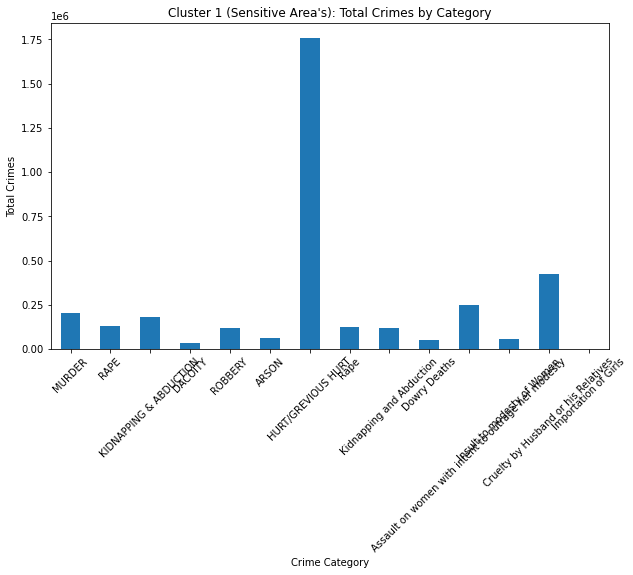

Cluster 2: Moderate Area's
            STATE/UT           DISTRICT  YEAR  MURDER  RAPE  \
5     ANDHRA PRADESH      GUNTAKAL RLY.  2001       3     0   
19    ANDHRA PRADESH  SECUNDERABAD RLY.  2001       6     0   
20    ANDHRA PRADESH         SRIKAKULAM  2001      38     8   
22    ANDHRA PRADESH    VIJAYAWADA RLY.  2001       2     1   
23    ANDHRA PRADESH      VISAKHA RURAL  2001      58    12   
...              ...                ...   ...     ...   ...   
8591        DELHI UT              SOUTH  2012      39    70   
8594        DELHI UT                STF  2012       0     0   
8596     LAKSHADWEEP        LAKSHADWEEP  2012       0     0   
8597      PUDUCHERRY           KARAIKAL  2012       5     6   
8598      PUDUCHERRY         PUDUCHERRY  2012      24     7   

      KIDNAPPING & ABDUCTION  DACOITY  ROBBERY  ARSON  HURT/GREVIOUS HURT  \
5                          0        5        2      0                   1   
19                         0        0       10      0         

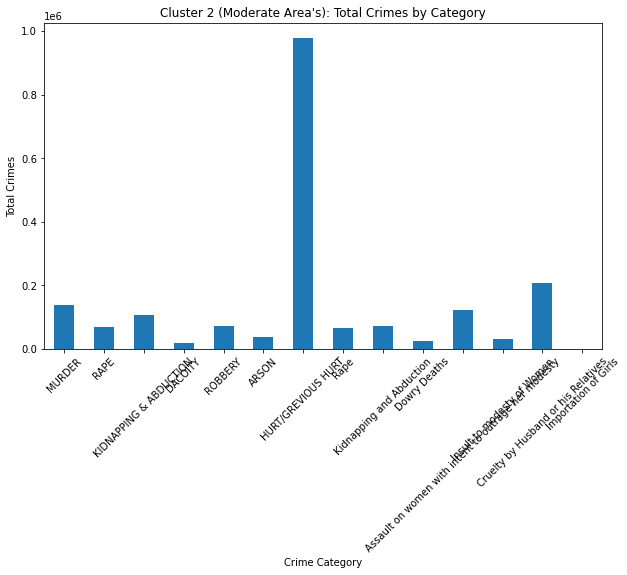

Cluster 3: Peaceful Area's
            STATE/UT        DISTRICT  YEAR  MURDER  RAPE  \
6     ANDHRA PRADESH          GUNTUR  2001     182    54   
7     ANDHRA PRADESH  HYDERABAD CITY  2001     111    37   
8     ANDHRA PRADESH      KARIMNAGAR  2001     162    56   
18    ANDHRA PRADESH     RANGA REDDY  2001     214    72   
99             BIHAR           PATNA  2001     434    27   
...              ...             ...   ...     ...   ...   
8561     WEST BENGAL         KOLKATA  2012      85    68   
8562     WEST BENGAL           MALDA  2012     118   158   
8563     WEST BENGAL     MURSHIDABAD  2012     174   257   
8564     WEST BENGAL           NADIA  2012     146   174   
8571     WEST BENGAL  UTTAR DINAJPUR  2012     110    92   

      KIDNAPPING & ABDUCTION  DACOITY  ROBBERY  ARSON  HURT/GREVIOUS HURT  \
6                         82       16       59     43                1792   
7                         80       13       67      0                3137   
8                    

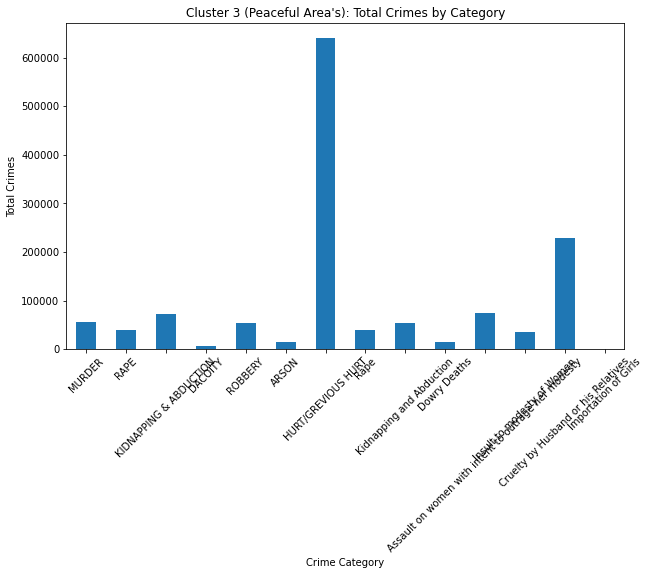

In [32]:
# Printing data for each cluster
for i, cluster_df in enumerate(cluster_dfs):
    print(f"Cluster {i+1}: {cluster_labels[i]}")
    print(cluster_df)
    print()


    # Bar plot of total crimes for each category
    category_columns = ["MURDER", "RAPE", "KIDNAPPING & ABDUCTION", "DACOITY", "ROBBERY", "ARSON",
                        "HURT/GREVIOUS HURT", "Rape", "Kidnapping and Abduction",
                        "Dowry Deaths", "Assault on women with intent to outrage her modesty",
                        "Insult to modesty of Women", "Cruelty by Husband or his Relatives",
                        "Importation of Girls"]
    category_totals = cluster_df[category_columns].sum()
    category_totals.plot(kind="bar", figsize=(10, 6))
    plt.xlabel("Crime Category")
    plt.ylabel("Total Crimes")
    plt.title(f"Cluster {i+1} ({cluster_labels[i]}): Total Crimes by Category")
    plt.xticks(rotation=45)
    plt.show()

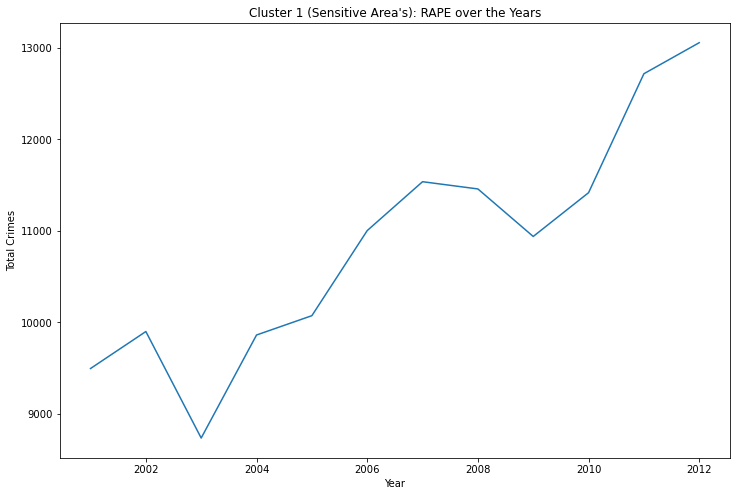

In [36]:
 # Line plot of a specific crime category over the years
specific_category = "RAPE"
category_by_year = cluster_df.groupby("YEAR")[specific_category].sum()
category_by_year.plot(kind="line", figsize=(12, 8))
plt.xlabel("Year")
plt.ylabel("Total Crimes")
plt.title(f"Cluster {i+1} ({cluster_labels[i]}): {specific_category} over the Years")
plt.show()

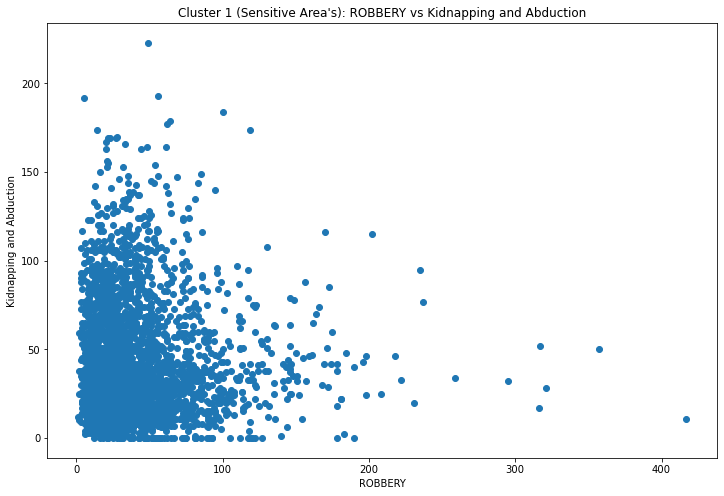

In [43]:
# Scatter plot of two crime categories
crime_category1 = "ROBBERY"
crime_category2 = "Kidnapping and Abduction"
plt.figure(figsize=(12,8))
plt.scatter(cluster_df[crime_category1], cluster_df[crime_category2])
plt.xlabel(crime_category1)
plt.ylabel(crime_category2)
plt.title(f"Cluster {i+1} ({cluster_labels[i]}): {crime_category1} vs {crime_category2}")
plt.show()

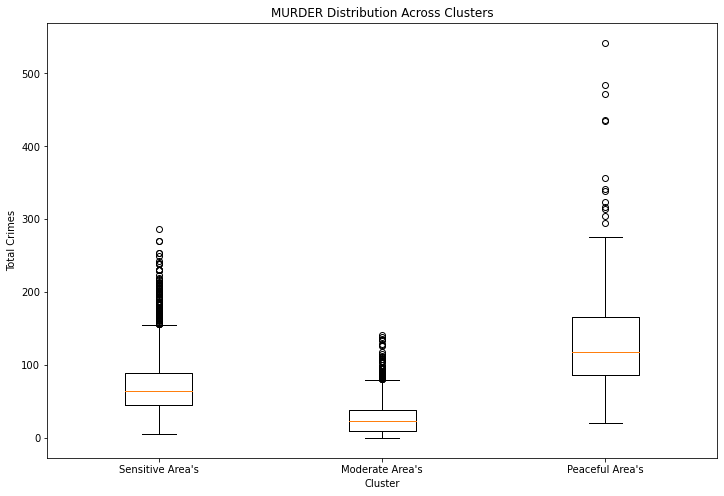

In [44]:
# Box plot of a specific crime category across clusters
specific_category = "MURDER"
cluster_names = [cluster_labels[j] for j in range(len(cluster_labels))]
cluster_data = [cluster_df[specific_category] for cluster_df in cluster_dfs]
plt.figure(figsize=(12,8))
plt.boxplot(cluster_data, labels=cluster_names)
plt.xlabel("Cluster")
plt.ylabel("Total Crimes")
plt.title(f"{specific_category} Distribution Across Clusters")
plt.show()

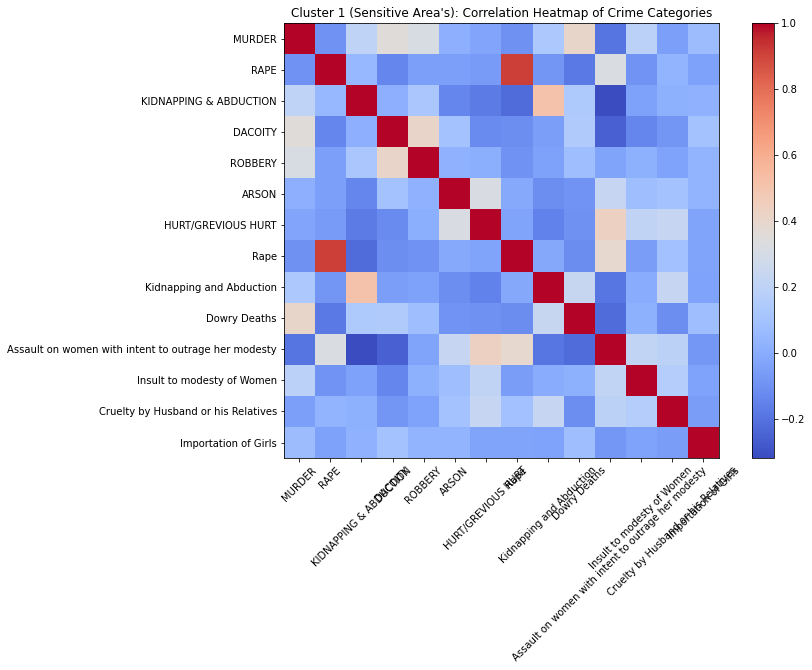

In [45]:
# Heatmap of correlation matrix for crime categories
crime_correlation = cluster_df[category_columns].corr()
plt.figure(figsize=(12, 8))
plt.imshow(crime_correlation, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(category_columns)), category_columns, rotation=45)
plt.yticks(range(len(category_columns)), category_columns)
plt.title(f"Cluster {i+1} ({cluster_labels[i]}): Correlation Heatmap of Crime Categories")
plt.show()

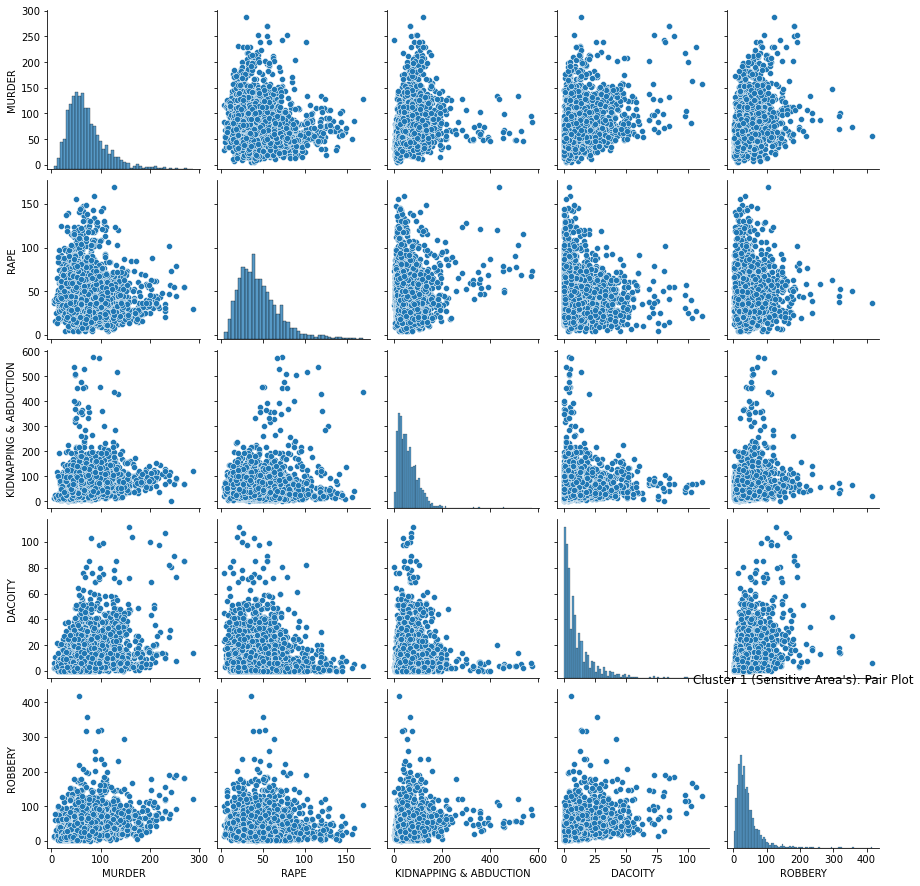

In [46]:
# Selecting the variables for the pair plot
variables = ["MURDER", "RAPE", "KIDNAPPING & ABDUCTION", "DACOITY", "ROBBERY"]

# Filter the cluster DataFrame for the specific cluster
cluster_df = cluster_dfs[i]

# Creating the pair plot
sns.pairplot(cluster_df[variables])
plt.title(f"Cluster {i+1} ({cluster_labels[i]}): Pair Plot")
plt.show()

### Report on Crime Analysis Clusters:

#### Cluster 1: Sensitive Area's

##### Observations:

1. The most impacting crimes in sensitive areas are "RAPE", "KIDNAPPING & ABDUCTION", and "ROBBERY".
2. These areas require immediate attention and increased security measures to address these high-crime categories.
3. Steps should be taken to enhance law enforcement presence and ensure the safety of residents, especially women and girls.

#### Cluster 2: Moderate Area's

##### Observations:

1. The most impactful crimes in moderate areas are "MURDER" and "HURT/GREVIOUS HURT".
2. While the crime rates in moderate areas are relatively lower than sensitive areas, addressing these crimes is still crucial   to maintain a safe environment.
3. Community policing programs and initiatives focusing on reducing violence and ensuring public safety would be beneficial.
 
#### Cluster 3: Peaceful Area's

##### Observations:

1. Peaceful areas have relatively low crime rates across all categories.
2. The crimes reported in these areas are significantly lower compared to sensitive and moderate areas.
3. These areas can serve as models for implementing effective crime prevention strategies and community engagement programs.


##### Recommendations:

1. Sensitive Areas: Enhance security measures, increase police presence, and promote community awareness to prevent and address crimes such as rape, kidnapping, and robbery.
2. Moderate Areas: Focus on reducing violent crimes through community-oriented policing, social support programs, and educational initiatives to promote non-violence.
3. Peaceful Areas: Continue maintaining low crime rates through proactive community engagement, fostering strong neighborhood networks, and encouraging citizen involvement in crime prevention efforts.


#### Safe and Unsafe Districts:

1. Based on the cluster analysis, the districts within the Sensitive Area's cluster are likely to be the most unsafe due to higher crime rates.
2. The districts within the Peaceful Area's cluster can be considered the safest, as they exhibit lower crime rates across all categories.
3. Detailed analysis of crime data at the district level can provide more insights into specific safe and unsafe districts.

#### Exaplaination:

Overall, this analysis provides valuable information for understanding crime patterns and developing targeted strategies to reduce crime and improve public safety in different types of areas. It is essential to collaborate with law enforcement agencies, community organizations, and local residents to implement the recommended measures effectively.

#### 4.4   Capstone project overall story in your own words. Min 1000 words.



## Capstone Project-(Crimes in India)


### Understanding India's Criminal Landscape: A Journey of Analysis and Insights

##### Introduction:

The problem of crime has been a long-standing concern in the vibrant and diversified country of India. This capstone project seeks to study Indian crime statistics in order to draw important conclusions about this difficult issue. We intend to learn more about the variables affecting crime rates through analysis of the data, discover crime hotspots, and suggest tactics for decreasing crime and boosting public safety.


##### Data Collection and Preprocessing:
The collection and preprocessing of crime data marks the beginning of our adventure. We carefully organised and cleaned the data we obtained from criminal databases and government reports to ensure its accuracy and uniformity. We have a substantial dataset that spans several years and includes a variety of crime categories, despite the difficulties encountered during data collecting.

##### Exploratory Data Analysis: 
It is essential to comprehend India's broad criminal environment before going further into specific crime patterns. We find fascinating information about how crimes are distributed around states, districts, and crime types through exploratory data analysis. Visualisations and statistics present a complete picture, allowing us to identify trends and patterns that call for more research.

##### Crime Hotspots and Sensitive Areas:
To further analyse crime trends, we use clustering techniques to pinpoint crime hotspots and divide neighbourhoods into sensitive, moderate, and peaceful subgroups. We can determine which kind of crimes have the greatest impact by looking at the features of each cluster. For law enforcement organisations and policymakers, these findings are of utmost importance since they give them the information they need to allocate resources wisely.

##### Factors Affecting Crime Rates: 
Crime is a complex subject that is affected by a number of socioeconomic and demographic variables. Our investigation goes into these elements to look for connections between certain variables and particular sorts of crimes. We can better understand the underlying factors that contribute to crime by disentangling these links and then suggest focused measures to deal with them.

##### Recomendations for Crime Reduction:
We provide ideas for lowering crime rates in India based on the knowledge gained from our analysis. We support a comprehensive strategy that incorporates stepped-up police enforcement, neighbourhood engagement activities, and social programming aimed at vulnerably positioned groups. We can significantly improve the safety of society by dealing with the root causes of crime.

##### Districts that are Safe and Unsafe: 
Throughout India's enormous territory, some districts stand out as safe havens while others struggle with high crime rates. We can shed light on the variables influencing a district's safety or unsafety by identifying these districts and examining their characteristics. A low-crime environment can be maintained in safe districts and improved public safety in high-crime areas thanks to the analysis.

##### Conclusion:
In conclusion, our capstone project paints a comprehensive picture of the crime landscape in India. Through meticulous data analysis, we have unraveled hidden insights and identified trends that can shape effective crime prevention strategies. By harnessing the power of data-driven approaches, we can empower policymakers, law enforcement agencies, and communities to collaboratively tackle crime and enhance public safety.

##### Limitations and Future Work:
While this capstone project provides valuable insights, it is not without its limitations. Data availability and quality constraints may have impacted the analysis to some extent. Additionally, the scope of the project allows for further exploration and improvement. Future work could involve expanding the dataset, incorporating additional socio-economic factors, and employing advanced predictive modeling techniques to forecast crime trends more accurately.

##### References:
Throughout this project, we have relied on a range of resources, including government reports, crime databases, research papers, and relevant literature. A detailed list of references can be found at the end of the project, acknowledging the sources that have contributed to our analysis.